# WARP-V: An Open-Source CPU Generator

<a href="https://colab.research.google.com/github/ALI11-2000/sscs-ose-code-a-chip.github.io/blob/main/Notebooks/warpv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Ali Imran
SPDX-License-Identifier: Apache-2.0
```


|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Ali Imran <br /> Email ID: ali1120001@outlook.com|University of Engineering and Technology, Lahore|No|No|

Welcome!
This notebook serves as an introduction to WARP-V which is an open-source CPU generator written in TL-Verilog provided by Redwood EDA. It provides options for reconfigurable pipeline and also provides support for RISC-V and MIPS ISA. In this notebook, we are going to utilize different tools provided by the Redwood EDA to generate a simple RISC-V based core and then we will use the OpenLane flow to generate its ASIC.   

## Generating Core Configurations

First, we are going to go to generate the configuration for our core using the online WARP-V generator. For this purpose, visit https://warp-v.org/ . On the webpage you will see the following configuration form.

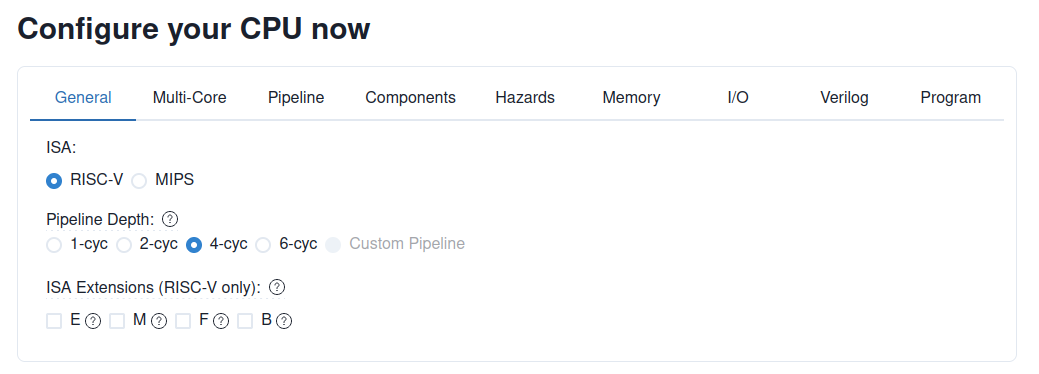


Once you have selected the configuration. Scroll down the webpage to the Core Details section. There the core configuration has been generated in TL-Verilog like this.


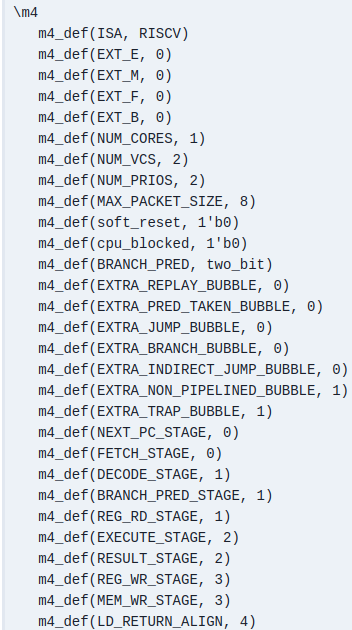

Copy the configurations generated in the previous section to next cell. Once the configuration has been copied execute the cell so that the core design file can be created.

## Creating Design File

In [35]:
%%writefile warpv_core.tlv
\m4_TLV_version 1d --bestsv --noline: tl-x.org
\SV
   /*
   Copyright 2022 Redwood EDA
   
   Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
   
   The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
   
   THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
   */
\m4
   m4_def(IMEM_STYLE, EXTERN)
   m4_def(DMEM_STYLE, EXTERN)

   // Copy your core configurations here
   
   m4_def(ISA, RISCV)
   m4_def(EXT_E, 0)
   m4_def(EXT_M, 0)
   m4_def(EXT_F, 0)
   m4_def(EXT_B, 0)
   m4_def(NUM_CORES, 1)
   m4_def(NUM_VCS, 2)
   m4_def(NUM_PRIOS, 2)
   m4_def(MAX_PACKET_SIZE, 8)
   m4_def(soft_reset, 1'b0)
   m4_def(cpu_blocked, 1'b0)
   m4_def(BRANCH_PRED, two_bit)
   m4_def(EXTRA_REPLAY_BUBBLE, 0)
   m4_def(EXTRA_PRED_TAKEN_BUBBLE, 0)
   m4_def(EXTRA_JUMP_BUBBLE, 0)
   m4_def(EXTRA_BRANCH_BUBBLE, 0)
   m4_def(EXTRA_INDIRECT_JUMP_BUBBLE, 0)
   m4_def(EXTRA_NON_PIPELINED_BUBBLE, 1)
   m4_def(EXTRA_TRAP_BUBBLE, 1)
   m4_def(NEXT_PC_STAGE, 0)
   m4_def(FETCH_STAGE, 0)
   m4_def(DECODE_STAGE, 1)
   m4_def(BRANCH_PRED_STAGE, 1)
   m4_def(REG_RD_STAGE, 1)
   m4_def(EXECUTE_STAGE, 2)
   m4_def(RESULT_STAGE, 2)
   m4_def(REG_WR_STAGE, 3)
   m4_def(MEM_WR_STAGE, 3)
   m4_def(LD_RETURN_ALIGN, 4)
\SV
   // Include WARP-V.
   
   m4_include_lib(['https://raw.githubusercontent.com/ALI11-2000/warp-v/1d9674ce50e970dbbe0d01d29e10fe2cba86c7fe/warp-v.tlv'])
                   
   m4_ifelse(M4_MAKERCHIP,1,['
   m4_sv_get_url(['https://raw.githubusercontent.com/ALI11-2000/mpw-waprv/main/verilog/rtl/sky130_sram_1kbyte_1rw1r_32x256_8.v'])
   m4_sv_get_url(['https://raw.githubusercontent.com/ALI11-2000/mpw-waprv/699c8bfee4668d8ef603e29822cd014138ace14c/verilog/rtl/imem.hex'])
   
	m4_makerchip_module
   	logic [31:0] dmem_addra;
      logic [31:0] dmem_addrb;
      logic [31:0] dmem_dina ;
      logic [31:0] dmem_dinb ;
      logic [3:0]  dmem_wea  ;
      logic        dmem_wea0 ;
      logic [3:0]  dmem_web  ;
      logic        dmem_ena  ;
      logic        dmem_enb  ;
      logic [31:0] dmem_doutb;
      logic [31:0] imem_addr ;
      logic [31:0] imem_data ;
      logic        clk_h;
                  
      warpv_core dut( dmem_addra,
                      dmem_addrb,
                      dmem_dina ,
                      dmem_dinb ,
                      dmem_wea  ,
                      dmem_wea0 ,
                      dmem_web  ,
                      dmem_ena  ,
                      dmem_enb  ,
                      dmem_doutb,
                      imem_addr ,
                      imem_data ,
                      clk, reset);
                  
     sky130_sram_1kbyte_1rw1r_32x256_8 imem(
        .clk0(clk),.csb0(1'b1),.web0('0),.wmask0('0),.addr0('0),.din0('0),.dout0(),
        .clk1(clk),.csb1(1'b0),.addr1(imem_addr),.dout1(imem_data)
      );
     
     sky130_sram_1kbyte_1rw1r_32x256_8 dmem(
        .clk0(clk),.csb0(dmem_ena),.web0(dmem_wea0),.wmask0(dmem_wea),
        .addr0(dmem_addra),.din0(dmem_dina), .dout0(),
        .clk1(clk),.csb1(dmem_enb),.addr1(dmem_addrb),.dout1(dmem_doutb)
    );
     initial
   	begin
      clk_h = 1;
   	$display("Loading RAM from %0s", "./sv_url_inc/imem.hex");
   	$readmemh("./sv_url_inc/imem.hex", imem.mem);
   	end
                  
     always_ff@(posedge clk) begin
         clk_h = !clk_h;
      end
           
   endmodule
   '])
                   
	module warpv_core( output [31:0] dmem_addra,
                      output [31:0] dmem_addrb,
                      output [31:0] dmem_dina ,
                      output [31:0] dmem_dinb ,
                      output [3:0]  dmem_wea  ,
                      output        dmem_wea0 ,
                      output [3:0]  dmem_web  ,
                      output        dmem_ena  ,
                      output        dmem_enb  ,
                      input  [31:0] dmem_doutb,
                      output [31:0] imem_addr ,
                      input  [31:0] imem_data,
                      input         clk, reset);

\TLV
   m4+cpu(/top)
   m4+cpu_viz(|fetch, "#7AD7F0")
\SV
   endmodule

Overwriting warpv_core.tlv


## Using Makerchip IDE
Now we will use the Makerchip IDE to simulate and debug our core. For this purpose, copy the code in the previous cell excluding the first line. Then open the Makerchip IDE on your browser by visiting https://app.makerchip.com/sandbox#. Once there, copy your code there and then simulate it using Ctrl-Enter.

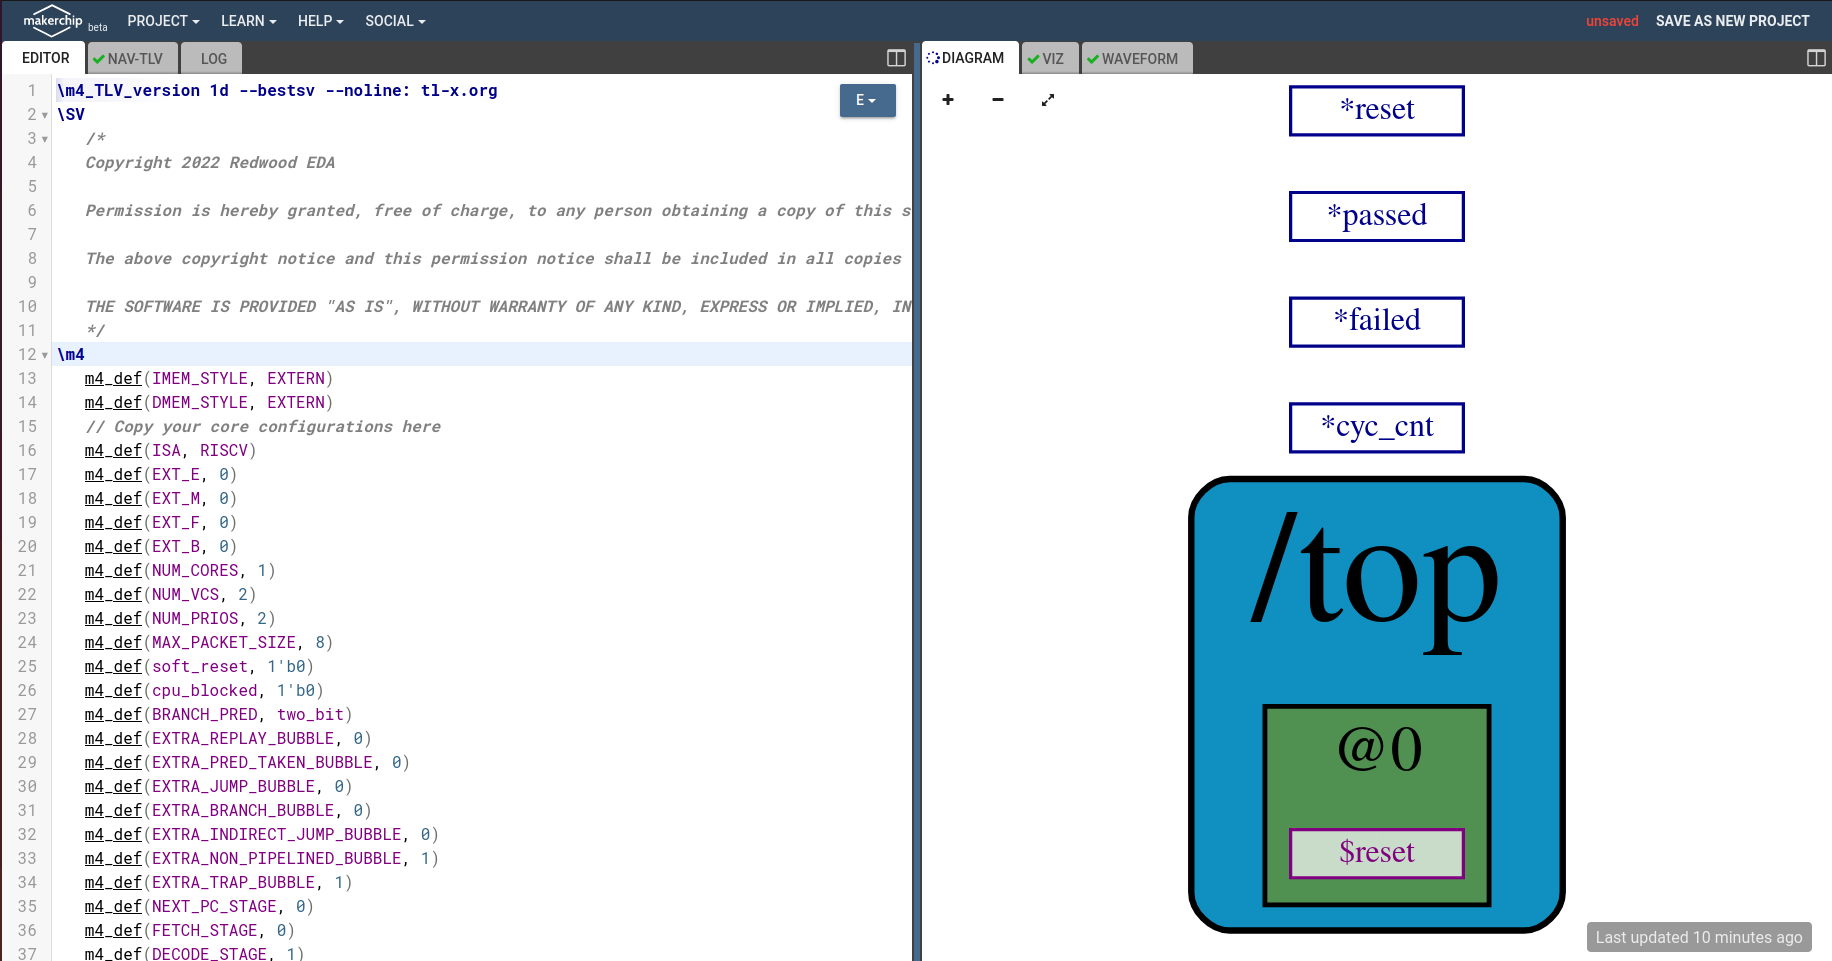

Now go to the VIZ tab. There you will see that you can visualize the core which is a powerful aspect of the IDE. You can see which instruction is being executed on each cycle.

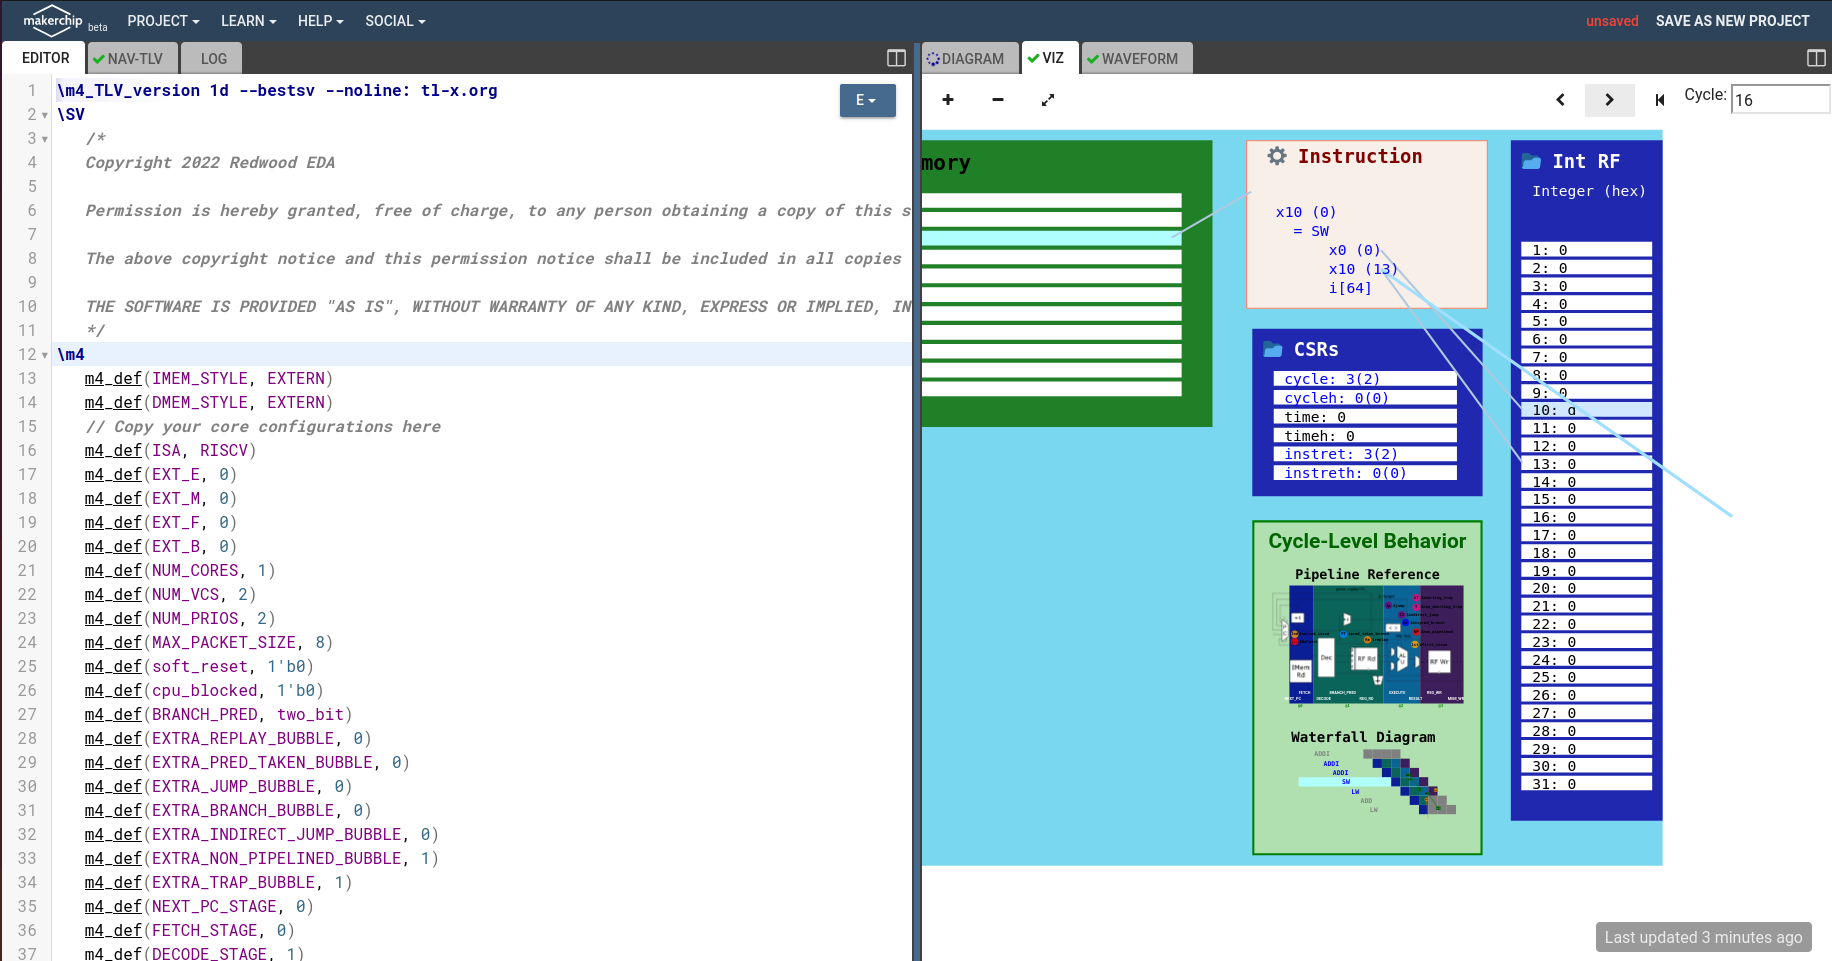

Once you have simulated the design. Update the previous cell incase of any update in the design.

## WARP-V with OpenLane
Now we will run the WARP-V design through the OpenLane flow targeting the Skywater PDK.

### Setting up OpenLane

In [36]:
# Installing the dependencies
openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!pip install sandpiper-saas
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --quiet --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.sky130a={open_pdks_version}
!CI=0 bin/micromamba install --quiet --yes --prefix $CONDA_PREFIX \
                     --channel conda-forge \
                     gdstk

env: CONDA_PREFIX=/content/conda-env
env: PATH=/content/conda-env/bin:/content/conda-env/bin:/content/conda-env/bin:/content/conda-env/bin:/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts
env: LD_LIBRARY_PATH=/content/conda-env/lib:/content/conda-env/lib:/content/conda-env/lib:/content/conda-env/lib:/content/conda-env/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sandpiper_saas-1.0.1-py3-none-any.whl (5.3 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Using cached path-16.5.0-py3-none-any.whl (26 kB)
  Using cached charset_normalizer-2.1.1-

In [ ]:
!pip install sandpiper-saas cairosvg

### Generating Verilog Design with Sandpiper-Saas
Now we will use the sandpiper-saas tool provided by Redwood EDA with to generate the Verilog design from the TL-Verilog source generated above.

In [49]:
!sandpiper-saas -o warpv_core.v -i warpv_core.tlv --outdir . --sv_url_inc --inlineGen --noline --clkAlways --hdl verilog 

You have agreed to our Terms of Service here: https://makerchip.com/terms.
INFORM(0) (PROD_INFO):
	SandPiper(TM) 1.14-2022/10/10-beta-Pro from Redwood EDA, LLC
	(DEV) Run as: "java -jar sandpiper.jar --inlineGen --noline --clkAlways --hdl verilog --outdir=out --nopath -i ./warpv_core.m4out.tlv -o warpv_core.v
	For help, including product info, run with -h.

INFORM(0) (LICENSE):
	Licensed to "Redwood EDA, LLC" as: Full Edition.

INFORM(0) (FILES):
	Reading "./warpv_core.m4out.tlv"
	to produce:
		Translated HDL File: "out/warpv_core.v"

INFORM(0) (ARGS): File 'warpv_core.tlv' Line 1 (char 60)
	Preprocessed as './warpv_core.m4out.tlv':1(ch60):
	+-----------------------------------------------------------v
	>\TLV_version [\source warpv_core.tlv] 1d --bestsv --noline: tl-x.org
	+-----------------------------------------------------------^
	The following arguments given in input file are ignored since there is no --iArgs argument.
		 --bestsv --noline



### Writing the OpenLane Configuration

In [39]:
%%writefile config.tcl
set ::env(DESIGN_NAME) warpv_core

set script_dir [file dirname [file normalize [info script]]]
set ::env(VERILOG_FILES) "warpv_core.v"

set ::env(CLOCK_PORT) "clk"
set ::env(CLOCK_NET) ""
set ::env(CLOCK_PERIOD) "15"

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 900 600"

set ::env(PL_BASIC_PLACEMENT) 0
set ::env(PL_TARGET_DENSITY) 0.25

# You can draw more power domains if you need to 
set ::env(VDD_NETS) [list {vccd1}]
set ::env(GND_NETS) [list {vssd1}]

set ::env(DIODE_INSERTION_STRATEGY) 4 
# If you're going to use multiple power domains, then disable cvc run.
set ::env(RUN_CVC) 1

Overwriting config.tcl


### Running OpenLane Flow

In [40]:
%env PDK=sky130A
!flow.tcl -design .

env: PDK=sky130A
OpenLane 2022.11.12_3_g1298859-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: not enough values to unpack (expected 3, got 1)
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 0059588eebfc704681dc2368bd1d33d96281d10f)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
The version of magic used in building the PDK does not match the version OpenLane was tested on (installed: f0668447616c071f145d3d3fa1dfde9762b62b7b, tested: 94daf986ab9aa94a9ae2ac3539fa5def9bd2a1ac)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: 

### Display Layout

In [62]:
import pathlib
import gdstk
import IPython.display
import cairosvg

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('warp-v.svg')
cairosvg.svg2png(url='warp-v.svg', write_to='warp-v.png')
IPython.display.Image('warp-v.png')

### Flow Report

In [46]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

0
design                                     /content
design_name                              warpv_core
config                      RUN_2022.11.21_17.18.09
flow_status                          flow completed
total_runtime                           0h50m39s0ms
routed_runtime                          0h39m18s0ms
(Cell/mm^2)/Core_Util                  40788.888889
DIEAREA_mm^2                                   0.54
CellPer_mm^2                           20394.444444
OpenDP_Util                                    23.1
Peak_Memory_Usage_MB                        1955.15
cell_count                                    11013
tritonRoute_violations                            0
Short_violations                                  0
MetSpc_violations                                 0
OffGrid_violations                                0
MinHole_violations                                0
Other_violations                                  0
Magic_violations                                  0
antenna_violations                               -1
lvs_total_errors                                 -1
cvc_total_errors                                 -1
klayout_violations                               -1
wire_length                                  992218
vias                                         131023
wns                                             0.0
pl_wns                                          0.0
optimized_wns                                   0.0
fastroute_wns                                   0.0
spef_wns                                        0.0
tns                                             0.0
pl_tns                                          0.0
optimized_tns                                   0.0
fastroute_tns                                   0.0
spef_tns                                        0.0
HPWL                                    760937023.0
routing_layer1_pct                              0.0
routing_layer2_pct                             58.0
routing_layer3_pct                            40.77
routing_layer4_pct                            19.92
routing_layer5_pct                             8.47
routing_layer6_pct                             1.81
wires_count                                   10823
wire_bits                                     14141
public_wires_count                              543
public_wire_bits                               3830
memories_count                                    0
memory_bits                                       0
processes_count                                   0
cells_pre_abc                                 12415
AND                                             237
DFF                                             490
NAND                                            481
NOR                                             300
OR                                             1587
XOR                                             467
XNOR                                            198
MUX                                            4201
inputs                                         1718
outputs                                        1600
level                                            32
EndCaps                                         424
TapCells                                       7276
Diodes                                            0
Total_Physical_Cells                           7700
CoreArea_um^2                           512471.5008
power_slowest_internal_uW                        -1
power_slowest_switching_uW                       -1
power_slowest_leakage_uW                         -1
power_typical_internal_uW                        -1
power_typical_switching_uW                       -1
power_typical_leakage_uW                         -1
power_fastest_internal_uW                        -1
power_fastest_switching_uW                       -1
power_fastest_leakage_uW                         -1
critical_path_ns                                 -1
suggested_clock_period                        

#Acknowledgements
Special thanks to my mentor Mr. Steve Hoover (Founder of Redwood EDA).